## Projeto TCC - Análise de Sentimentos usando NLP com base criada

#### Parte 1 - Conhecendo o dataset

In [1]:
#Importando as bibliotecas necessárias para análise do dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ler o dataset e criar um dataframe, pegando as 5 primeiras ocorrências para verificar se funcionou
df = pd.read_csv("base_sentimentos.csv", sep=";")
df.head()

,date,tweet,language,sentimento
0,20/08/2021,"Com certeza, fiz a melhor escolha! Estou muito...",pt,1
1,20/08/2021,Me sinto tão inteligente falando sobre elétric...,pt,1
2,20/08/2021,cara eu tava feliz demais-,pt,1
3,20/08/2021,@skyprongs vc compartilha o aniversario com o ...,pt,1
4,20/08/2021,"Gente o karma continua cobrando o @Saduske32, ...",pt,1


In [3]:
#Entender o total de linhas no DataFrame e também verificar a distribuição de sentimentos positivos e negativos

total = df.shape
pos = df.query("sentimento == 1").shape
neg = df.query("sentimento == 0").shape

print("Temos um total de",total[0],"registros, sendo que destes",pos[0],"são positivos e",neg[0],"são negativos.")

Temos um total de 280549 registros, sendo que destes 141288 são positivos e 139261 são negativos.


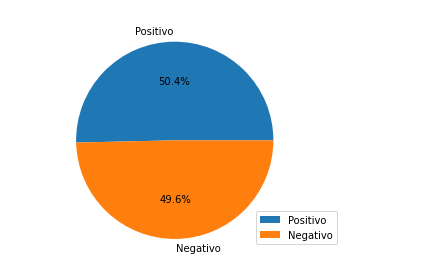

In [4]:
#Criando um plot do tipo "Pizza" para melhor visualizar a distribuição de sentimentos do DataFrame.

labels = ['Positivo', 'Negativo']
sizes = [df.query("sentimento == 1").shape[0],df.query("sentimento == 0").shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.legend(labels=labels, loc="lower right")
ax1.set_title("Distribuição de sentimentos no DataFrame", pad=10, loc="left", fontsize=20, color='white')
plt.show()

#### Parte 2 - Criação da "Bag of Words" e primeiro treinamento

In [5]:
#importanto as bibliotecas necessárias
from sklearn.feature_extraction.text import CountVectorizer   #essa biblioteca serve para criar uma representação em numeros das palavras, a "bag of words"
from sklearn.model_selection import train_test_split          #biblioteca do sklearn com objetivo de separar modelos em treino e teste
from sklearn.naive_bayes import MultinomialNB                 #esse é o algoritmo de ML que iremos usar para treinar nosso modelo.

In [6]:
#Construindo a "bag of words"

vetorizar = CountVectorizer(lowercase=False,max_features=50)
bag_of_words = vetorizar.fit_transform(df['tweet'])
print(bag_of_words.shape)

(280549, 50)


In [7]:
#Para facilitar futuros testes e novos treinamentos após aplicação de técnicas de NLTK vamos criar uma função para classificar nosso modelo e retornar a Acuracia do mesmo.
def treinamento_modelo(base, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False,max_features=50)
    bag_of_words = vetorizar.fit_transform(base[coluna_texto])
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, base[coluna_classificacao], random_state=42)
    clf = MultinomialNB()
    clf.fit(x_train,y_train)
    return clf.score(x_test,y_test)

In [8]:
modelo1 = treinamento_modelo(df,"tweet","sentimento")
modelo1

0.6484787133935955

#### Parte 3 - Visualização das nossas palavras através do gráfico de WordCloud

In [9]:
#Importar as bibliotecas necessarias para construção da WordCloud (O matplotlib já foi importado acima)
from wordcloud import WordCloud

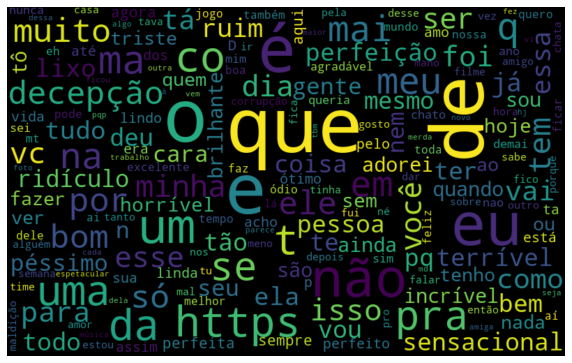

In [10]:
#Para criar esse gráfico teremos que juntar todas as palavras em uma unica lista, para isso usaremos o .join do Pandas

todas_palavras = ' '.join([tweet for tweet in df['tweet']])
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
#É bem mais interessante vermos a nuvem de palavras subdivida de acordo com os sentimentos positivos e negativos, portanto vamos criar funções que tragam isso

def nuvem_palavras_neg(base, coluna_texto):
    tweet_negativo = base.query("sentimento == '0'")
    todas_palavras = ' '.join([tweet for tweet in tweet_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_pos(base, coluna_texto):
    tweet_positivo = base.query("sentimento == '1'")
    todas_palavras = ' '.join([tweet for tweet in tweet_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

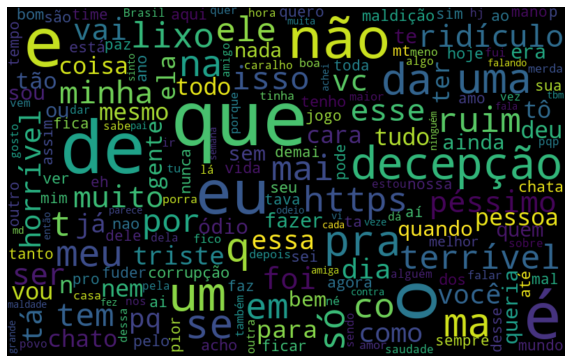

In [12]:
#vamos gerar a Nuvem Negativa
nuvem_palavras_neg(df,"tweet")

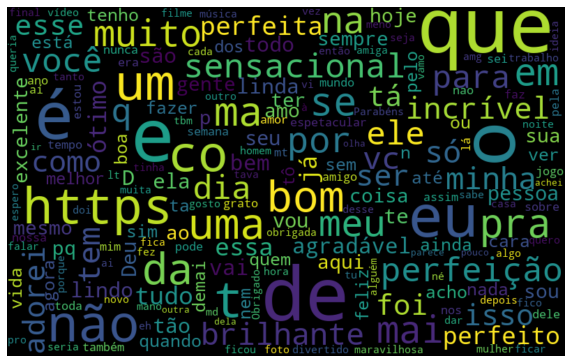

In [13]:
#vamos gerar a Nuvem Positiva
nuvem_palavras_pos(df,"tweet")

#### Parte 4 - Aplicação de Processamento de Linguagem Natural no dataset

##### 4.1 Tokenizando os dados

In [14]:
#importanto a biblioteca a ser utilizada
import nltk
from nltk import tokenize

In [15]:
#Vamos criar um conjunto de todas as palavras do DataFrame para verificar a frequência que elas aparecem
token_espaco = tokenize.WhitespaceTokenizer()
todas_palavras = ' '.join([texto for texto in df["tweet"]])
frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                             "Frequência": list(frequencia.values())})

In [16]:
#vamos ver o dataframe criado pela frequencia
df_frequencia.head()

,Palavra,Frequência
0,Com,677
1,"certeza,",60
2,fiz,1261
3,a,77153
4,melhor,3822


In [17]:
#Agora é preciso ordenar para verificarmos as palavras mais frequentes.
df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = 10)
df_frequencia

,Palavra,Frequência
25,que,99797
44,de,99042
65,e,86884
3,a,77153
17,o,76372
300,é,71599
34,eu,53708
26,não,44405
171,um,40932
108,do,40718


In [18]:
#Vamos criar uma função para gerar um gráfico que traga a frequência de maneira mais simples!

def grafico(base, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in base[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

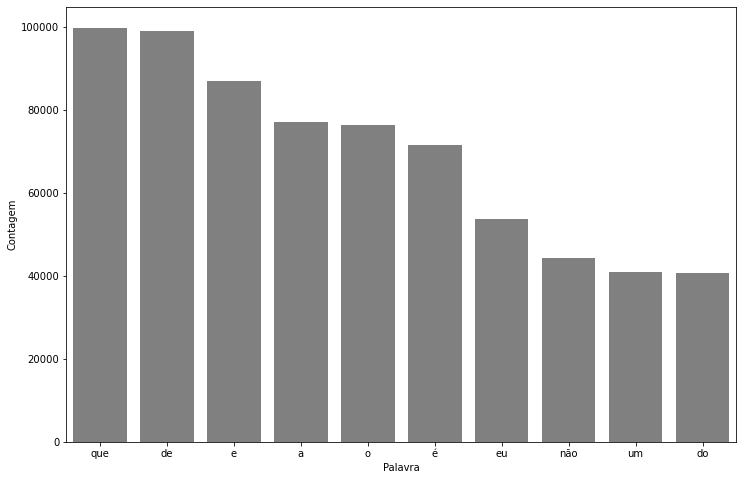

In [19]:
#Usando a função
grafico(df, "tweet", 10)

##### 4.2 Remoção de pontuação e stopwords

In [20]:
#importar biblioteca que traz todas as pontuações em Pt-br
from string import punctuation

In [21]:
#Vamos criar agora uma lista com as stopwords e com as pontuações para remove-las do dataset
stopwords = nltk.corpus.stopwords.words("portuguese")
token_pontuacao = tokenize.WordPunctTokenizer()
palavra_comum_tweet=['https', 'co', ':)', '://', ':(', 't', 'q', 'pra', 'ta', 'ser', '...', 'Eu', 'E']


pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + stopwords + palavra_comum_tweet

frase_processada = list()

for tweet in df["tweet"]:
    new_tweet = list()
    palavras_texto = token_pontuacao.tokenize(tweet)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            new_tweet.append(palavra)
    frase_processada.append(' '.join(new_tweet))
    
df["tweet_sem_sw_pont"] = frase_processada

In [22]:
print(pontuacao_stopwords)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estive

In [23]:
df.head()

,date,tweet,language,sentimento,tweet_sem_sw_pont
0,20/08/2021,"Com certeza, fiz a melhor escolha! Estou muito...",pt,1,Com certeza fiz melhor escolha Estou feliz !!!!
1,20/08/2021,Me sinto tão inteligente falando sobre elétric...,pt,1,Me sinto tão inteligente falando sobre elétric...
2,20/08/2021,cara eu tava feliz demais-,pt,1,cara tava feliz demais
3,20/08/2021,@skyprongs vc compartilha o aniversario com o ...,pt,1,skyprongs vc compartilha aniversario boto !! f...
4,20/08/2021,"Gente o karma continua cobrando o @Saduske32, ...",pt,1,Gente karma continua cobrando Saduske32 tanto ...


In [24]:
modelo2 = treinamento_modelo(df,"tweet_sem_sw_pont","sentimento")
modelo2

0.7624540192192535

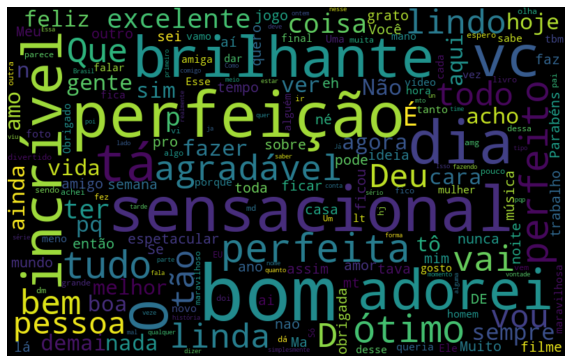

In [25]:
#vamos verificar como ficou a nuvem positiva
nuvem_palavras_pos(df,"tweet_sem_sw_pont")

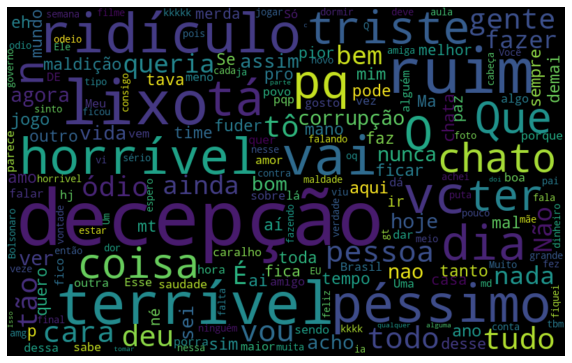

In [26]:
#vamos verificar como ficou a nuvem negativa
nuvem_palavras_neg(df,"tweet_sem_sw_pont")

##### 4.3 Normalizando os tweets

In [27]:
#vamos importar a biblioteca que fará a normalizacao
import unidecode

In [28]:
#Agora vamos remover os acentos de todo o dataset
sem_acentos = [unidecode.unidecode(tweet) for tweet in df["tweet_sem_sw_pont"]]

In [29]:
#vamos precisar remover também os acentos das stowords, senão muitas voltaram ao nosso dataset
stopwords_sem_acento = [unidecode.unidecode(tweet) for tweet in pontuacao_stopwords]

In [30]:
#agora basta reprocessar usando o mesmo código para remover as stopwords sem acento.
df["tweet_sem_acentos"] = sem_acentos

frase_processada = list()
for tweet in df["tweet_sem_acentos"]:
    new_tweet = list()
    palavras_texto = token_pontuacao.tokenize(tweet)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            new_tweet.append(palavra)
    frase_processada.append(' '.join(new_tweet))
    
df["tweet_sem_acentos"] = frase_processada

In [31]:
modelo3 = treinamento_modelo(df,"tweet_sem_acentos","sentimento")
modelo3

0.7743591205908352

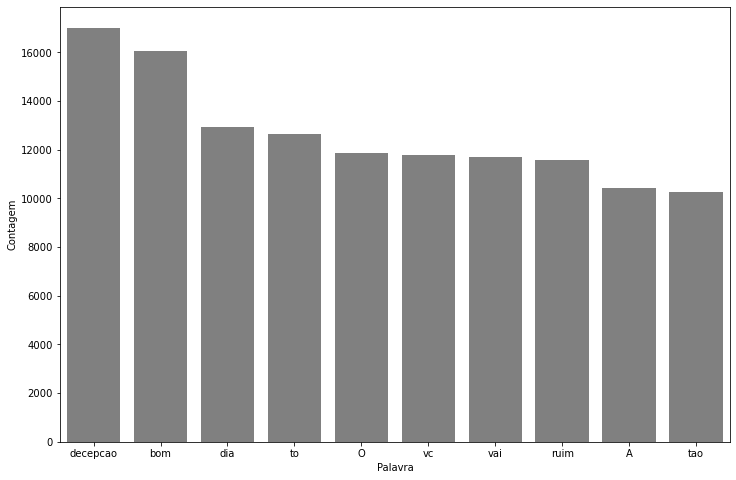

In [32]:
grafico(df,"tweet_sem_acentos",10)

##### 4.4 Todas as palavras como minusculas

In [33]:
#transformar todas as palavras em minusculas para vermos se melhora o modelo
frase_processada = list()
for tweet in df["tweet_sem_acentos"]:
    new_tweet = list()
    tweet = tweet.lower()
    palavras_texto = token_pontuacao.tokenize(tweet)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            new_tweet.append(palavra)
    frase_processada.append(' '.join(new_tweet))
    
df["tweet_minusculos"] = frase_processada

In [34]:
modelo4 = treinamento_modelo(df,"tweet_minusculos","sentimento")
modelo4

0.8133964470044769

##### 4.5 Aplicação da técnica de Stemmer - Evitar flexão e derivação de palavras

In [35]:
#Vamos chamar a função do stemmer com o nltk
stemmer = nltk.RSLPStemmer()

In [36]:
frase_processada = list()
for tweet in df["tweet_minusculos"]:
    new_tweet = list()
    palavras_texto = token_pontuacao.tokenize(tweet)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            new_tweet.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(new_tweet))
    
df["tweets_stemmer"] = frase_processada

In [37]:
#Vamos treinar nosso modelo e verificar o resultado
modelo5 = treinamento_modelo(df,"tweets_stemmer","sentimento")
modelo5

0.8186289885653997

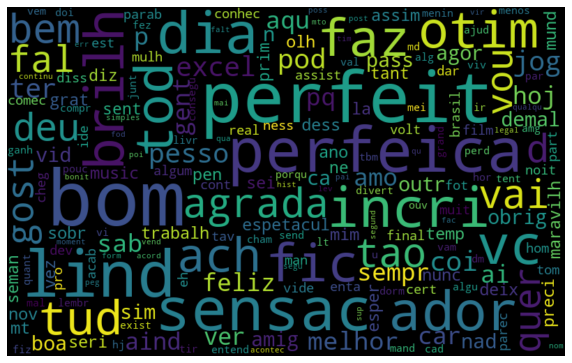

In [38]:
#Vamos agora analisar como muda a nossa nuvem de palavras Positivas
nuvem_palavras_pos(df,"tweets_stemmer")

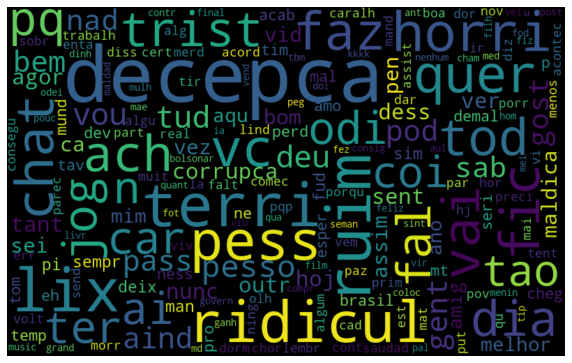

In [39]:
#Vamos agora analisar como muda a nossa nuvem de palavras Negativas
nuvem_palavras_neg(df,"tweets_stemmer")

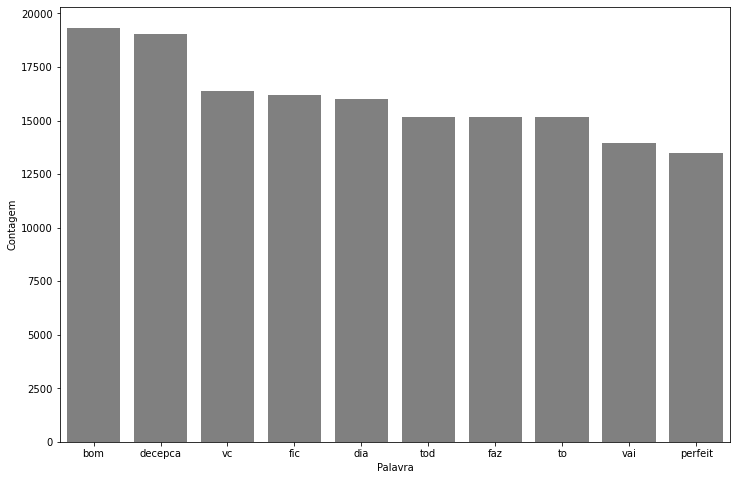

In [40]:
#Vamos ver o grafico
grafico(df,"tweets_stemmer",10)

##### 4.6 Aplicação da técnica TF-IDF  

In [41]:
#Importar a biblioteca para aplicar o algoritmo
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
#Chamar a função do TF IDF
vetorizar = TfidfVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.tweets_stemmer)

In [43]:
#Aplicar no nosso texto
x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df['sentimento'], random_state=42)
clf = MultinomialNB()
clf.fit(x_train,y_train)
modelo6 = clf.score(x_test,y_test)

##### 4.7 Aplicando o Ngrams

In [44]:
#Importar a biblioteca para aplicar o modelo
from nltk import ngrams

In [45]:
#Aplicar no nosso texto

vetorizar = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
bag_of_words = vetorizar.fit_transform(df.tweets_stemmer)

x_train, x_test, y_train, y_test = train_test_split(bag_of_words, df['sentimento'], random_state=42)
clf = MultinomialNB()
clf.fit(x_train,y_train)
modelo7 = clf.score(x_test,y_test)
modelo7

0.8431520716302148

In [46]:
final = modelo7-modelo1
print("O resultado sem aplicar nenhuma técnica de NLP foi de",modelo1.round(4)*100,"%")
print("O resultado removendo StopWords e a pontuação foi de",modelo2.round(4)*100,"%")
print("O resultado removendo todos os acentos foi de",modelo3.round(4)*100,"%")
print("O resultado aplicando o lowercase foi de",modelo4.round(2)*100,"%")
print("O resultado aplicando a técnica de stemmer foi de",modelo5.round(4)*100,"%")
print("O resultado aplicando o TF-IDF foi de",modelo6.round(4)*100,"%")
print("O resultado transformando em Ngrams foi de",modelo7.round(4)*100,"%")
print("Com aplicação de técnicas de NLP tivemos um ganho de", final.round(4)*100,"%")

O resultado sem aplicar nenhuma técnica de NLP foi de 64.85 %
O resultado removendo StopWords e a pontuação foi de 76.25 %
O resultado removendo todos os acentos foi de 77.44 %
O resultado aplicando o lowercase foi de 81.0 %
O resultado aplicando a técnica de stemmer foi de 81.86 %
O resultado aplicando o TF-IDF foi de 81.98 %
O resultado transformando em Ngrams foi de 84.32 %
Com aplicação de técnicas de NLP tivemos um ganho de 19.470000000000002 %


In [47]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
def print_metrics(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    threshold = 0.00001

    acc = float(tp + tn)/float(tp + fp + tn + fn + threshold)
    prec = float(tp)/float(tp + fp + threshold)
    rec = float(tp)/float(tp + fn + threshold)
    spec = float(tn)/float(tn + fp + threshold)
    
    print("Acc\t\tPrec\t\tRec\t\tSpec\t\tTP\tFN\tFP\tTN")
    print("{:2f}\t{:2f}\t{:2f}\t{:2f}\t{:d}\t{:d}\t{:d}\t{:d}".format(acc*100.0,prec*100.0,rec*100.0,spec*100.0,tp,fn,fp,tn))

In [49]:
y_pred = clf.predict(x_test)

print_metrics(y_test, y_pred)

Acc		Prec		Rec		Spec		TP	FN	FP	TN
84.315207	82.610094	87.227599	81.358465	30821	4513	6488	28316


In [50]:
import pickle

In [51]:
pickle.dump(clf, open('model_save', 'wb'))